## Car Price Prediction: Identifying Key Factors Influencing Automobile Pricing in the U.S. Market

## Problem Description:
A Chinese automobile company plans to enter the US market by setting up a local manufacturing unit. To compete effectively, they’ve hired a consulting firm to analyze which factors influence car prices in the American market. Using extensive survey data, the goal is to identify key variables that significantly impact pricing and evaluate how well these variables predict a car's price.
## Business Goal:
The goal is to build a model predicting car prices based on independent variables to help management understand pricing dynamics. This will enable them to adjust car designs, business strategies, and meet specific price targets. The model also aids in understanding the pricing dynamics of entering a new market.


## 1. Loading and Preprocessing 

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("C:\\Users\\AMAN MUJEEB\\Downloads\\CarPrice_Assignment.csv")

# Initial Inspection
print(df.head())
print(df.info())

# Drop Car_ID and CarName (CarName is textual with too many categories)
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

# Convert categorical variables using Label Encoding or One-Hot Encoding
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split features and target
X = df.drop('price', axis=1)
y = df['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

## 2. Model Implementation

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# Train and store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }


## 3. Model Evaluation

In [4]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='R2', ascending=False))



                         R2           MSE          MAE
Random Forest      0.957972  3.317860e+06  1262.022573
Gradient Boosting  0.925248  5.901221e+06  1678.363598
Decision Tree      0.894859  8.300272e+06  1886.321146
Linear Regression  0.892557  8.482008e+06  2089.382729
SVR               -0.099896  8.683025e+07  5697.876605


## 4. Feature Importance

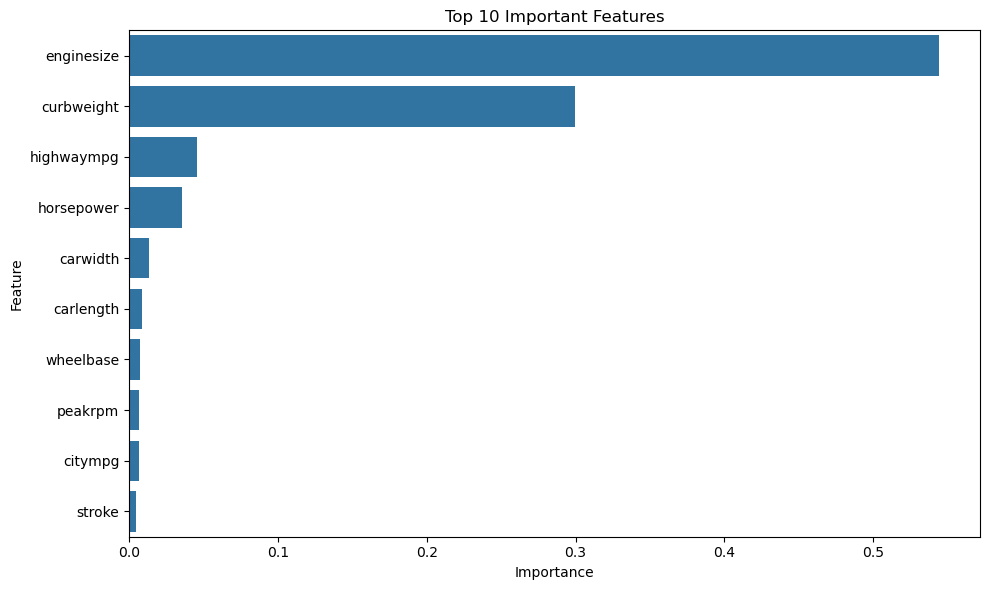

In [5]:
# Using Random Forest (example)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()


## 5. Hyperparameter Tuning

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model performance
best_model = grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("Tuned Model R2 Score:", r2_score(y_test, y_pred_tuned))


Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model R2 Score: 0.9579719973412946
